<a href="https://colab.research.google.com/github/SunJaePark-Alex/hello/blob/master/VGG16_classification(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import numpy as np
import tensorflow as tf

import os
import sys
sys.path.insert(0, '/content/gdrive/My Drive/')

import vgg16
import utils

In [0]:
from skimage import io
import matplotlib.pyplot as plt

In [0]:
fn1 ="/content/gdrive/My Drive/colab_file/trafficlight.jpg"
#fn1 ="./test_data/puzzle.jpeg"
#fn1 ="./test_data/6201041_sd.jpg"
fn2 ="/content/gdrive/My Drive/colab_file/ballpoint.jpg"
#fn2 = "./test_data/IMG_0358s.jpg"

In [0]:
i1 = io.imread(fn1)
i2 = io.imread(fn2)

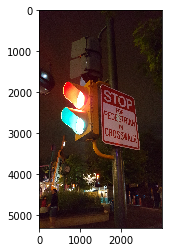

In [7]:
plt.imshow(i1)

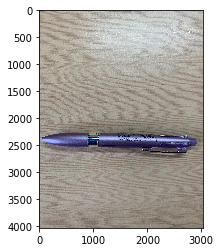

In [8]:
plt.imshow(i2)

In [9]:
img1 = utils.load_image(fn1)
img2 = utils.load_image(fn2)

# Just in case of using four-channel images
img1 = img1[:, :, :3]
img2 = img2[:, :, :3]

print(img1.shape)
print(img2.shape)

(224, 224, 3)
(224, 224, 3)


In [10]:
img1r = img1.reshape((1, 224, 224, 3))
img2r = img2.reshape((1, 224, 224, 3))

print(img1r.shape)
print(img2r.shape)

(1, 224, 224, 3)
(1, 224, 224, 3)


In [11]:
batch = np.concatenate((img1r, img2r), 0)
print(batch.shape)

(2, 224, 224, 3)


In [12]:
# !wget https://www.dropbox.com/s/8a8rei66f72um4i/vgg16.npy
vgg = vgg16.Vgg16()
#print(vgg.data_dict)

/content/gdrive/My Drive/vgg16.npy
npy file loaded


In [0]:
images = tf.placeholder("float", [2, 224, 224, 3])

In [14]:
vgg.build(images)

build model started


build model finished: 1s


In [0]:
# initialize
sess = tf.InteractiveSession()

In [0]:
feed_dict = {images: batch}
prob = sess.run(vgg.prob, feed_dict=feed_dict)

In [17]:
print(prob[0])

[6.21710825e-08 4.07804146e-06 1.63186462e-06 8.94463597e-07
 2.74733839e-06 1.73260082e-06 1.32760147e-06 3.33247885e-06
 1.94008953e-06 7.28310397e-07 5.77777882e-07 1.54316592e-06
 7.57315411e-06 4.22210974e-07 1.81989333e-06 8.07408753e-07
 1.47582830e-06 1.40862664e-06 2.33477340e-06 4.98807253e-07
 1.12500764e-07 4.91884350e-07 1.14327827e-06 3.74664933e-06
 1.08522795e-06 2.47509024e-06 1.21321065e-07 6.00701128e-07
 7.83565099e-07 4.98874783e-07 5.50455809e-07 2.34464915e-06
 4.28803787e-07 1.60854938e-07 2.41028744e-07 2.28544010e-07
 1.76890694e-07 2.67120640e-07 9.36427966e-08 2.23415725e-07
 2.60460922e-07 1.41812592e-07 6.08752487e-07 1.09659288e-06
 6.19581186e-08 4.05570745e-07 4.48701172e-07 3.47387697e-07
 6.61737047e-08 7.82602854e-08 1.88620319e-07 2.54136830e-05
 2.04811812e-07 2.35539645e-07 6.48913172e-08 5.36651271e-07
 4.09897382e-07 2.24330591e-07 8.33728109e-08 9.35083449e-07
 2.76082255e-06 7.45336095e-08 5.54061153e-08 4.81068270e-08
 1.79052540e-06 5.939128

In [18]:
print(prob[0].shape)

(1000,)


In [19]:
print(np.argmax(prob[0]))

920


In [0]:
# returns the top1 string
def print_prob(prob, file_path):
    synset = [l.strip() for l in open(file_path).readlines()]

    # print prob
    pred = np.argsort(prob)[::-1]

    # Get top1 label
    top1 = synset[pred[0]]
    print(("Top1: ", top1, prob[pred[0]]))
    # Get top5 label
    top5 = [(synset[pred[i]], prob[pred[i]]) for i in range(5)]
    print(("Top5: ", top5))
    return top1

In [21]:
#!cat synset.txt # Linux or Mac users
!type synset.txt # Windows users

/bin/bash: line 0: type: synset.txt: not found


In [22]:
top1 = print_prob(prob[0], '/content/gdrive/My Drive/synset.txt')

('Top1: ', 'n06874185 traffic light, traffic signal, stoplight', 0.6071536)
('Top5: ', [('n06874185 traffic light, traffic signal, stoplight', 0.6071536), ('n06794110 street sign', 0.33833557), ('n04081281 restaurant, eating house, eating place, eatery', 0.004184989), ('n03976657 pole', 0.0040746406), ('n02776631 bakery, bakeshop, bakehouse', 0.0033103237)])


In [23]:
print("Top1: {}".format(top1))

Top1: n06874185 traffic light, traffic signal, stoplight


In [24]:
print_prob(prob[1], '/content/gdrive/My Drive/synset.txt')

('Top1: ', 'n02783161 ballpoint, ballpoint pen, ballpen, Biro', 0.83413047)
('Top5: ', [('n02783161 ballpoint, ballpoint pen, ballpen, Biro', 0.83413047), ('n03388183 fountain pen', 0.081547596), ('n04154565 screwdriver', 0.03135876), ('n04116512 rubber eraser, rubber, pencil eraser', 0.011077117), ('n02951585 can opener, tin opener', 0.007822356)])


'n02783161 ballpoint, ballpoint pen, ballpen, Biro'